In [12]:
import pickle
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
import time
import os.path

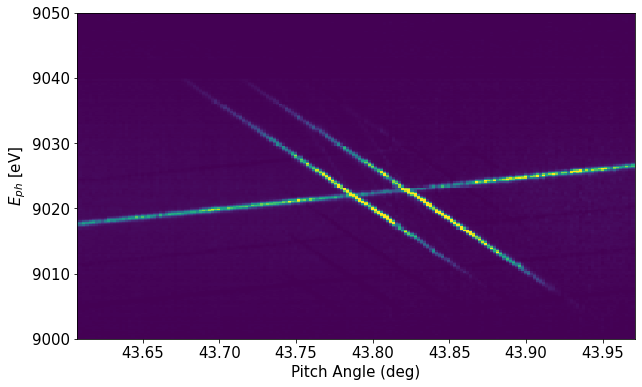

In [93]:
#directory = os.fsencode("./data.nosync/")
directory = r'data.nosync/' 

for file in os.listdir(directory):  
    filename = os.fsdecode(file)
    if filename.endswith('20200927-21_15_34_cor2d.npz'):
        filepath=os.path.join(dire, file)
        tt = np.load(filepath, allow_pickle=True)
        orig_image = tt['corr2d'].T
        spec_hist = tt['spec_hist']
        doocs_scale = tt['doocs_scale']
        np_phen = tt['phen_scale']
        doocs_vals_hist = tt['doocs_vals_hist']
        doocs_label = tt['doocs_channel']
        date_raw=filename[ 0 : 17 ]
        date_time_obj = datetime.strptime(date_raw, '%Y%m%d-%H_%M_%S')


        if len(doocs_scale) != len(orig_image):
            np_doocs=doocs_scale[:-1]
        else:
            np_doocs=doocs_scale
        phen_res=np_phen[2]-np_phen[1]
        angle_res_p=np_doocs[2]-np_doocs[1]
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        #fig.suptitle(filename, fontsize=14)

        plot = ax.pcolormesh(np_doocs, np_phen, orig_image, cmap='viridis', shading='auto', vmin=0, vmax=1200)
        ax.set_xlabel('Pitch Angle (deg)')
        ax.set_ylabel(r'$E_{ph}$ [eV]')
        plt.rcParams.update({'font.size': 15})
        plt.ylim(9000, 9050)
        #plt.xlim(111.51, 111.77)